# Pandas Cheat Sheet_3

* cheat sheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
* source:인프런_단두장의 문서로 데이터 분석과 시각화 뽀개기 by 박조은강사님
* https://www.inflearn.com/course/%ED%8C%90%EB%8B%A4%EC%8A%A4-pandas/

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = sns.load_dataset('iris')
df.shape

(150, 5)

In [3]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


## Summarize Data

### Counting vlalues, rows, columns...

In [4]:
df['species'].value_counts() #uique value별로 몇 개씩 있는지 #주로 categorical value에 씀

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

In [5]:
pd.DataFrame(df['species'].value_counts()) #pd.DataFrame() 으로 데이타프레임화

,species
virginica,50
setosa,50
versicolor,50


In [6]:
len(df) #행길이 

150

In [7]:
df.shape #행,열 길이

(150, 5)

In [8]:
df['species'].nunique() #unique 값이 몇 개 있는지 

3

### Summarizing (describe data)

In [9]:
df.describe() #수치형 값에 대한 요약

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.describe(include = 'all') #default는 none

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [11]:
df.describe(include = [np.object])  #숫자만: [np.number]

,species
count,150
unique,3
top,virginica
freq,50


### Functions for summarizing

In [12]:
df['petal_width'].sum() #합계

179.90000000000003

In [13]:
df.sum()

sepal_length                                                876.5
sepal_width                                                 458.6
petal_length                                                563.7
petal_width                                                 179.9
species         setosasetosasetosasetosasetosasetosasetosaseto...
dtype: object

In [14]:
df['petal_width'].count() #count

150

In [15]:
df['petal_width'].median()  #중앙값

1.3

In [16]:
df['petal_width'].mean() #평균값

1.199333333333334

In [17]:
df['petal_width'].quantile([0.25,0.75]) #사분위수(분위지정)

0.25    0.3
0.75    1.8
Name: petal_width, dtype: float64

In [18]:
df.min()  #최소값

sepal_length       4.3
sepal_width          2
petal_length         1
petal_width        0.1
species         setosa
dtype: object

In [19]:
df.max() #최대값

sepal_length          7.9
sepal_width           4.4
petal_length          6.9
petal_width           2.5
species         virginica
dtype: object

In [20]:
df.var()  #분산

sepal_length    0.685694
sepal_width     0.189979
petal_length    3.116278
petal_width     0.581006
dtype: float64

In [21]:
df.std()  #표준편차

sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64

## apply (function)

* Apply function to each object.
* Fuction can be internal, external(user defied), or lambda

In [33]:
df.apply(lambda x : x[3])

sepal_length       4.6
sepal_width        3.1
petal_length       1.5
petal_width        0.2
species         setosa
dtype: object

* **[lambda란?](https://www.analyticsvidhya.com/blog/2020/03/what-are-lambda-functions-in-python/)**

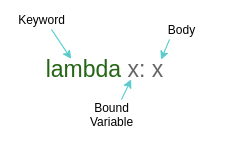

A lambda function is a small function containing a single expression. Lambda functions can also act as anonymous functions where they don’t require any name. These are very helpful when we have to perform small tasks with less code.

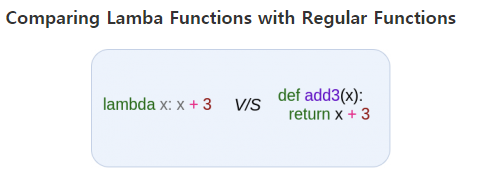

In [43]:
df['species_3'] = df['species'].apply(lambda x: x[:3])
df['species_3']

0      set
1      set
2      set
3      set
4      set
      ... 
145    vir
146    vir
147    vir
148    vir
149    vir
Name: species_3, Length: 150, dtype: object

In [44]:
#사용자정의함수 만들기 
# lambda와 달리 함수를 만드는 특정 형식을 따라야 하고, 함수 이름도 지정해야한다.

def smp(x) :
    #뒤에서 3번째까지의 문자를 가져오는 함수
    x= x[-3:]
    return(x)
    

In [45]:
#사용자 정의함수로 apply 써보기 
df['species-3'] = df['species'].apply(smp)
df['species-3']

0      osa
1      osa
2      osa
3      osa
4      osa
      ... 
145    ica
146    ica
147    ica
148    ica
149    ica
Name: species-3, Length: 150, dtype: object

In [46]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_3,species-3
0,5.1,3.5,1.4,0.2,setosa,set,osa
1,4.9,3.0,1.4,0.2,setosa,set,osa
2,4.7,3.2,1.3,0.2,setosa,set,osa
3,4.6,3.1,1.5,0.2,setosa,set,osa
4,5.0,3.6,1.4,0.2,setosa,set,osa
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,vir,ica
146,6.3,2.5,5.0,1.9,virginica,vir,ica
147,6.5,3.0,5.2,2.0,virginica,vir,ica
148,6.2,3.4,5.4,2.3,virginica,vir,ica
